In [33]:
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import awkward as ak
import dask
from hist.dask import Hist
from coffea.nanoevents import NanoEventsFactory, PHYSLITESchema, BaseSchema
from coffea.analysis_tools import PackedSelection
import mplhep
import uproot
import coffea.nanoevents
import math

PHYSLITESchema.warn_missing_crossrefs = False


$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu\partial_\mu-m)\psi$$
$\psi\rightarrow e^{i\alpha(x)}\psi$
$$\mathcal{L}=\bar{\psi}(i\gamma^\mu D_\mu-m)\psi$$
$D_\mu=\partial_\mu+ieA_\mu(x)$

<font color='red'>$V(\phi)$</font>
$V(\phi)$
$$V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4$$
$\phi\rightarrow-\phi$

### Spontaneous Symmetry Breaking

$\mathcal{L}=\frac{1}{2}(\partial_\mu\phi)(\partial^\mu\phi)-\frac{1}{2}m^2\phi^2$
$$V(\phi)=\frac{1}{2}\mu^2\phi^2+\frac{\lambda}{4!}\phi^4$$


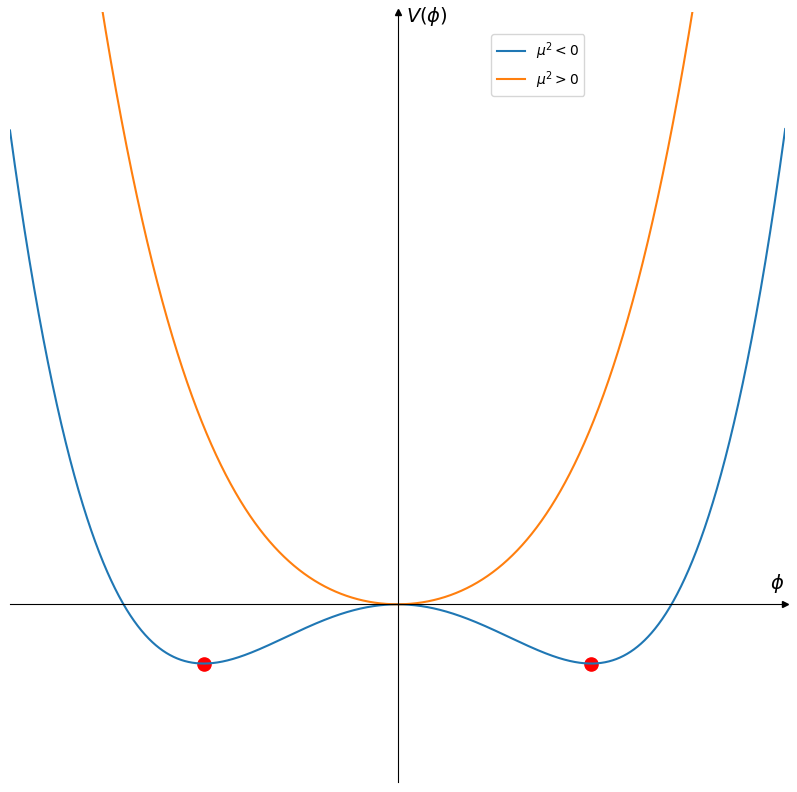

In [56]:
x = np.arange(-3, 3, .001)
mu2 = 4
lamda=24
vev = 6*mu2/lamda
V_min = -3*mu2**2/2/lamda
y_pos = mu2/2 * x**2 + lamda/math.factorial(4) * x**4
y_neg = -mu2/2 * x**2 + lamda/math.factorial(4) * x**4
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(x, y_neg, label=r'$\mu^2<0$')
ax.plot(x, y_pos, label=r'$\mu^2>0$')
ax.scatter([np.sqrt(vev),-np.sqrt(vev)], [V_min,V_min], marker='o', s=90, color='red')
ax.set_ylim(-3,10)
ax.set_xlim(-2, 2)

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(r'$\phi$', size=14, labelpad=-24, x=.99)
ax.set_ylabel(r'$V(\phi)$', size=14, labelpad=-21, y=.98, rotation=0)

# Get rid of ticks
ax.set_yticks([])
ax.set_xticks([])

ax.legend(bbox_to_anchor=(.75, .98))
plt.savefig('SSB_real_s')

plt.show()